In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker
from scipy.stats import sem
from collections import Counter as _Counter

import sys
sys.path.append('..')
sys.path.append('../lib')
from lib import *
plt.style.use('../peptidome.mplstyle')
from lib.plotting import model_labels as labels

import matplotlib.ticker as ticker

import json
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

## For original analyses and data derivation see https://github.com/andim/peptidome/tree/master/code/mivsdist

In [2]:
datadir ='../data/Figure Data/mutual_information'

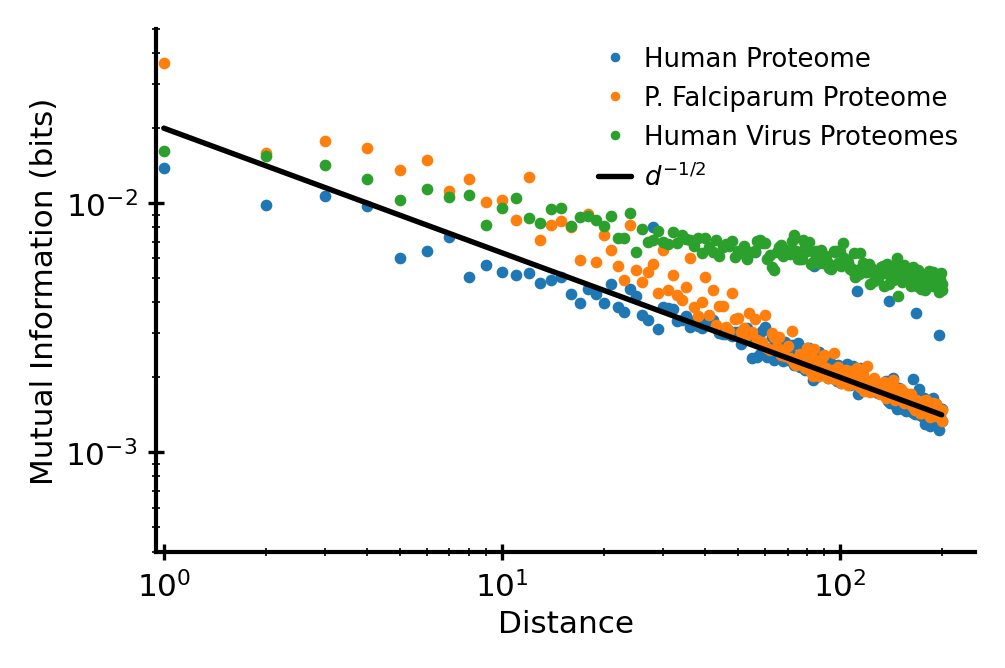

In [3]:
fig, ax = plt.subplots()

label_map = {
    'Human': 'Human Proteome',
    'Malaria': 'P. Falciparum Proteome',
    'Viruses': 'Human Virus Proteomes'
}
for species in ['Human', 'Malaria','Viruses']:
    df = pd.read_csv(f'{datadir}/mutualinformation-%s.csv'%species)
#     err = ax.errorbar(df['gaps']+1, df['mutualinformation'],
#             2*df['mutualinformation_std'], fmt='_', label=species, ms=3)
    ax.plot(df['gaps']+1, df['mutualinformation'], 'o',label=label_map[species],ms=2)

#    ax.plot(df['gaps']+1, df['shuffledmutualinformation'], '_', ms=3,
#            label=('shuffled') if species == 'Human' else '', c=err.lines[0].get_color())
d = np.linspace(1, 200)
#ax.plot(d, 0.005*np.exp(-d/50), zorder=10, label='exponential ($d_c=50$)')
l, = ax.plot(d, 0.02*d**-.5, zorder=10, c='k', label=r'$d^{-1/2}$')
ax.legend(loc='upper right', ncol=1)
ax.set_ylim(0.0004, 0.05)
ax.set_xlim(0.95, 251.0)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Distance')
ax.set_ylabel('Mutual Information (bits)')
fig.tight_layout()
# plt.savefig('../mutual_information.png')
# plt.savefig('../mutual_information.svg')

In [4]:
df['mutualinformation'].max()

np.float64(0.0162607047858465)

In [5]:
def get_counter(kmers):
    sb = ""
    for k in kmers:
        for i in range(kmers[k]):
            sb += k
    c =  _Counter(sb)
    denominator = len(sb)

    return [c[letter]/denominator for letter in aminoacids]


In [6]:
freqs = {}


fasta_dir = '../data'
for fasta in [
        'human-viruses-uniref90-filtered.fasta',
        'UP000000589Mouse.fasta.gz',
        'UP000001450Malaria.fasta.gz',
        'UP000000437Zebrafish.fasta.gz',
        'UP000000750StrepA.fasta',
        'UP000001584Tuberculosis.fasta',
        'UP000000539Chicken.fasta.gz',
        'UP000000817Listeria.fasta',
        'UP000005640Human.fasta.gz'
    ]:
    print(fasta)
    kmers = count_kmers_proteome(os.path.join(fasta_dir, fasta),9)
    freqs[fasta]  = get_counter(kmers)
    print('-----------------------------------')

human-viruses-uniref90-filtered.fasta
-----------------------------------
UP000000589Mouse.fasta.gz
-----------------------------------
UP000001450Malaria.fasta.gz
-----------------------------------
UP000000437Zebrafish.fasta.gz
-----------------------------------
UP000000750StrepA.fasta
-----------------------------------
UP000001584Tuberculosis.fasta
-----------------------------------
UP000000539Chicken.fasta.gz
-----------------------------------
UP000000817Listeria.fasta
-----------------------------------
UP000005640Human.fasta.gz
-----------------------------------


In [7]:
aminoacids

'ACDEFGHIKLMNPQRSTVWY'

In [8]:
load_proteomes()

,fullname,iedbname,speciesid,proteomeid,type,comment,path
shortname,,,,,,,
Human,Homo sapiens,Homo sapiens,9606,UP000005640,vertebrate,,UP000005640Human.fasta.gz
Mouse,Mus Musculus,Mus Musculus,10090,UP000000589,vertebrate,,UP000000589Mouse.fasta.gz
Chicken,Gallus gallus,Gallus gallus,9031,UP000000539,vertebrate,,UP000000539Chicken.fasta.gz
Zebrafish,Danio rerio,Danrio rerio,7955,UP000000437,vertebrate,,UP000000437Zebrafish.fasta.gz
Yeast,Saccharomyces cerevisiae,,,UP000002311,fungus,,UP000002311Yeast.fasta
Cockroach,Blattella germanica,Blattella germanica,6973,UP000245037,invertebrate,,UP000245037Cockroach.fasta.gz
Wheat,Triticum aestivum,Triticum aestivum,4565,UP000019116,plant,,UP000019116Wheat.fasta.gz
Soybean,Glycine max,Glycine max,3847,UP000008827,plant,,UP000008827Soybean.fasta.gz
Vaccinia,Vaccinia virus,Vaccinia virus,,UP000000344,virus,,UP000000344Vaccinia.fasta


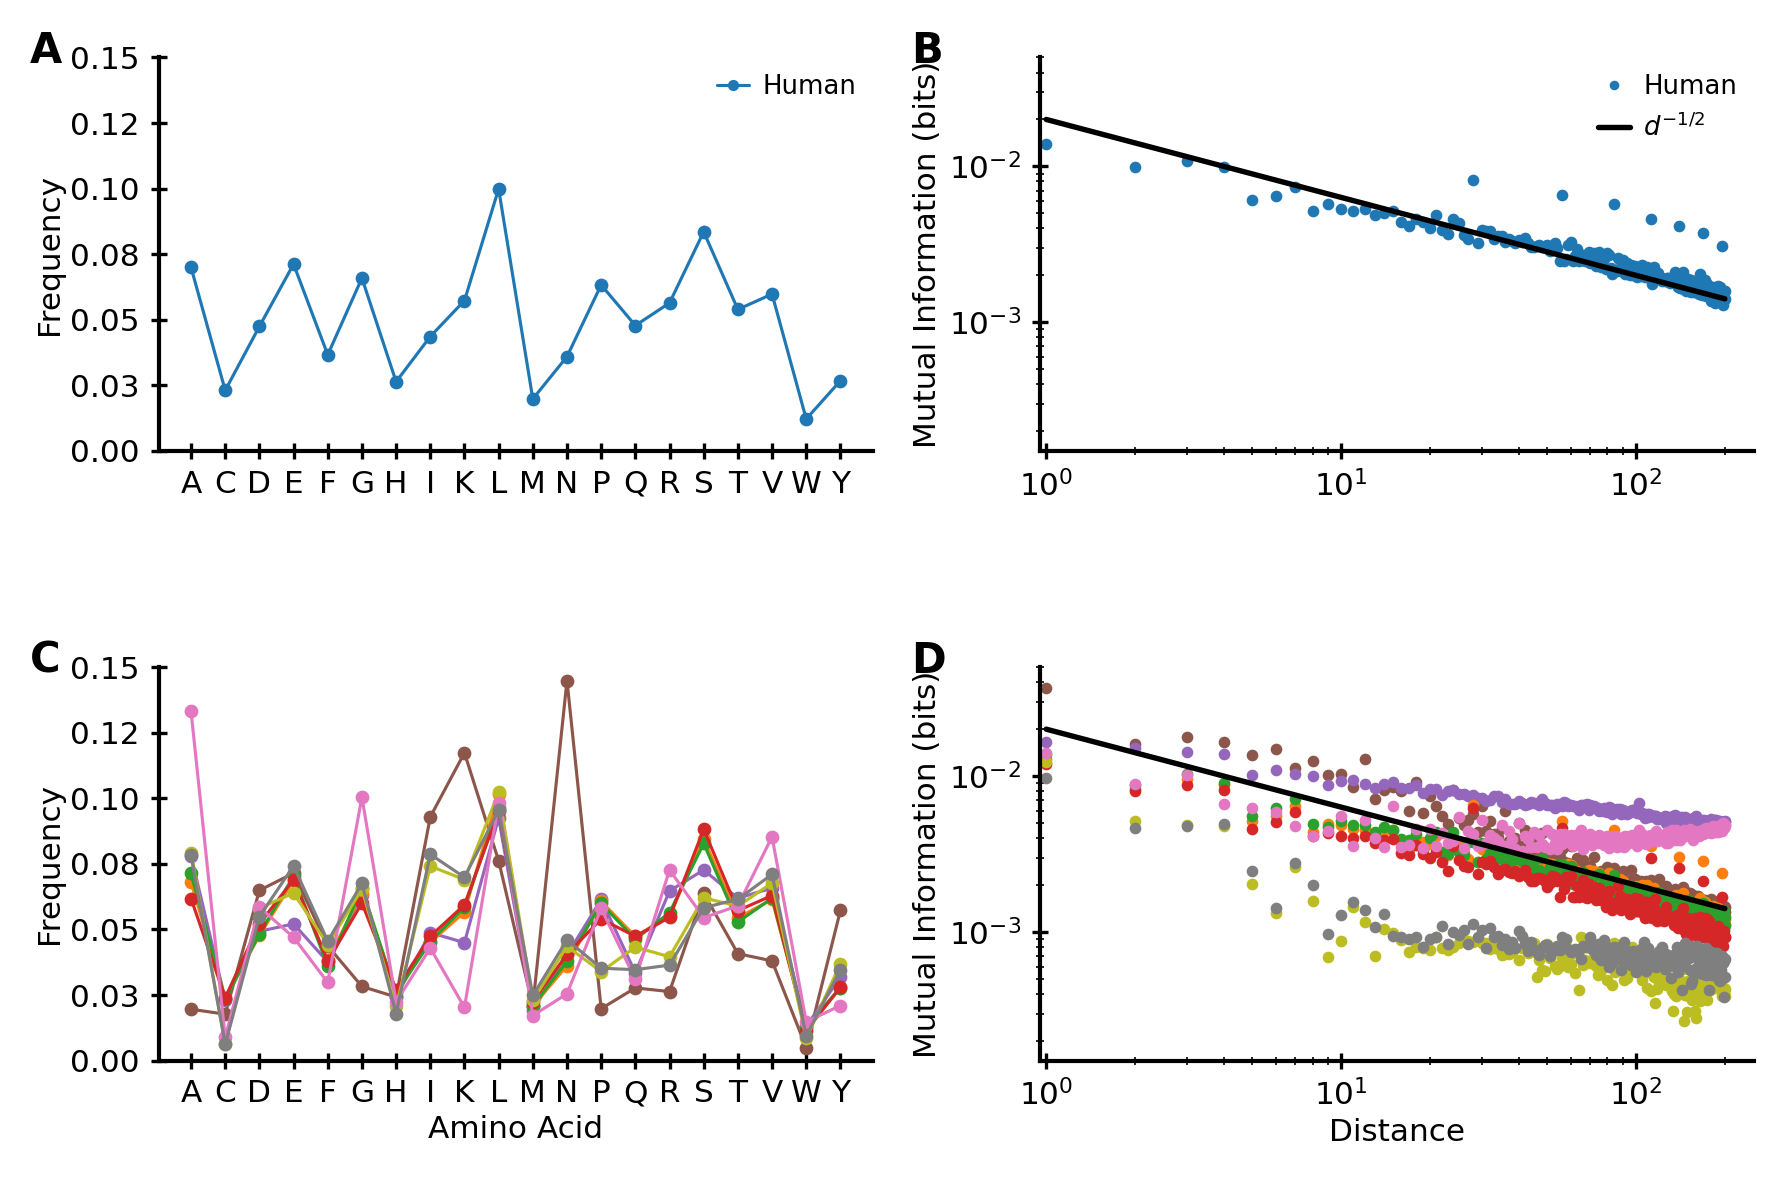

In [9]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(6,4))

color_map = {
    'P. Falciparum':'#8c564b',
    'Mouse': '#ff7f0e',
    'Chicken': '#2ca02c',
    'Zebrafish': '#d62728',
    'Human Virus Ensemble': '#9467bd',
    'Tuberculosis': '#e377c2',
    'Listeria': '#7f7f7f',
    'StrepA': '#bcbd22',
    'Human': '#1f77b4'
}

label_map = {
    'UP000005640Human.fasta.gz': 'Human',
    'UP000001450Malaria.fasta.gz': 'P. Falciparum',
    'human-viruses-uniref90-filtered.fasta': 'Human Virus Ensemble',
    'UP000000589Mouse.fasta.gz': 'Mouse',
    'UP000000539Chicken.fasta.gz': 'Chicken',
    'UP000000437Zebrafish.fasta.gz': 'Zebrafish',
    'UP000000750StrepA.fasta': 'StrepA',
    'UP000001584Tuberculosis.fasta': 'Tuberculosis',
    'UP000000817Listeria.fasta': 'Listeria'
}

   
      


for fasta, label in label_map.items():
    if label == 'Human':
        continue
    ax[1,0].plot(list(range(len(aminoacids))), freqs[fasta],'-o',label=label, linewidth=.75,color=color_map[label])

ax[0,0].plot(list(range(len(aminoacids))), freqs['UP000005640Human.fasta.gz'],'-o',label='Human', linewidth=.75,color=color_map['Human'])
ax[0,0].set_xticks(list(range(len(aminoacids))))
ax[1,0].set_xticks(list(range(len(aminoacids))))
ax[1,0].set_xticklabels(aminoacids)
ax[0,0].set_xticklabels(aminoacids)
ax[1,0].set_xlabel('Amino Acid')
ax[0,0].set_ylabel('Frequency')
ax[1,0].set_ylabel('Frequency')
ax[0,0].set_ylim([0,.15])
ax[0,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax[1,0].set_ylim([0,.15])
ax[1,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax[0,0].legend()

    
    
    
label_map = {
    'bsub_mutualinformation-Human.csv': 'Human',
    'bsub_mutualinformation-Malaria.csv': 'P. Falciparum',
    'bsub_mutualinformation-Viruses.csv': 'Human Virus Ensemble',
    'bsub_mutualinformation-Mouse.csv': 'Mouse',
    'bsub_mutualinformation-Chicken.csv': 'Chicken',
    'bsub_mutualinformation-Zebrafish.csv': 'Zebrafish',
    'bsub_mutualinformation-StrepA.csv': 'StrepA', 
    'bsub_mutualinformation-Tuberculosis.csv': 'Tuberculosis',
    'bsub_mutualinformation-Listeria.csv': 'Listeria'
    
}
     
for path, label in label_map.items():
    df = pd.read_csv(f'{datadir}/{path}')
    if label == 'Human':
        _ax = ax[0,1]
    else:
        _ax = ax[1,1]
    _ax.plot(df['gaps']+1, df['mutualinformation'], 'o',label=label,color=color_map[label],ms=2)


d = np.linspace(1, 200)
#ax.plot(d, 0.005*np.exp(-d/50), zorder=10, label='exponential ($d_c=50$)')
for _ax in [ax[0,1], ax[1,1]]:
    l, = _ax.plot(d, 0.02*d**-.5, zorder=10, c='k', label=r'$d^{-1/2}$')
    _ax.set_ylim(0.00015, 0.05)
    _ax.set_xlim(0.95, 251.0)
    _ax.set_xscale('log')
    _ax.set_yscale('log')
    _ax.set_ylabel('Mutual Information (bits)')

ax[0,1].legend()
ax[1,1].set_xlabel('Distance')

label_axes(fig, labelstyle='%s', xy=(-0.18, 1.07),fontsize=10)

fig.tight_layout()
fig.subplots_adjust(hspace=.55)
# plt.savefig('../s1.png')
# plt.savefig('../s1.svg')